In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

In [2]:
os.getcwd()

'C:\\Users\\iluxa'

In [3]:
dirs = []
df = pd.DataFrame()

In [4]:
for root, directory, file in os.walk("./data/"):
    for dname in directory:
        if re.match(r"\d{4}-\d{2}-\d{2}", dname):
            dirs.append(dname)

In [6]:
for current_dir in dirs:
    path_to_data = "".join(["./data/", current_dir])
    
    for root, directory, file in os.walk(path_to_data):
        if file:
            
            df_tmp = pd.read_csv("/".join([root, "data.csv"]), index_col=0)
            df_tmp["name"] = root.split("\\")[-1]
            df_tmp["date"] = current_dir
            
            df = df.append(df_tmp,ignore_index=True)

In [7]:
df

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...
156,66,4,Rostislav_Petrov,2020-12-09
157,39,2,Rostislav_Petrov,2020-12-09
158,82,4,Vasiliy_Ivanov,2020-12-09
159,74,2,Vasiliy_Ivanov,2020-12-09


In [8]:
df.quantity.sum()

480

In [11]:
df.groupby("name").agg({"quantity": "sum"}).sort_values(by="quantity", ascending=False)

,quantity
name,
Alexey_Smirnov,52
Petr_Smirnov,52
Anton_Smirnov,45
Petr_Fedorov,34
Kirill_Fedorov,28
Rostislav_Petrov,28
Vasiliy_Ivanov,27
Alexey_Fedorov,24
Anton_Ivanov,23


In [29]:
quant_vs_prod = df.groupby("product_id", as_index=False) \
                    .agg({"quantity": "sum"}) \
                    .sort_values(by="quantity", ascending=False) \
                    [:10]

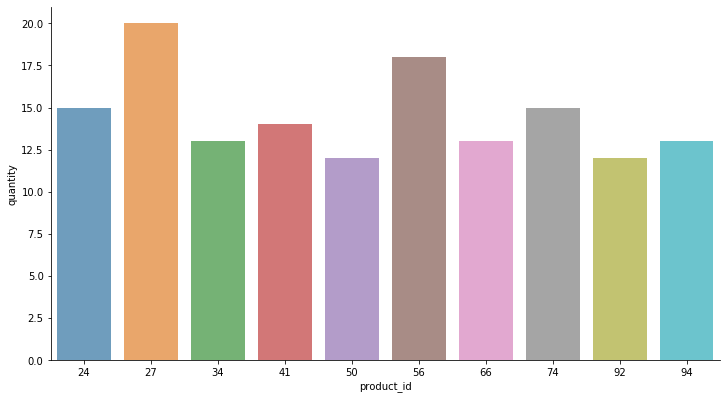

In [30]:
plt.figure(figsize=(12, 6.5))
sns.barplot(x=quant_vs_prod.product_id, y=quant_vs_prod.quantity, alpha=0.7) # color, palette="viridis"
sns.despine();

In [33]:
quant_vs_day = df.groupby("date", as_index=False) \
                    .agg({"quantity": "sum"}) \
                    .sort_values(by="quantity", ascending=False)

In [37]:
quant_vs_day

,date,quantity
1,2020-12-04,113
4,2020-12-07,94
6,2020-12-09,69
5,2020-12-08,68
2,2020-12-05,61
0,2020-12-03,60
3,2020-12-06,15


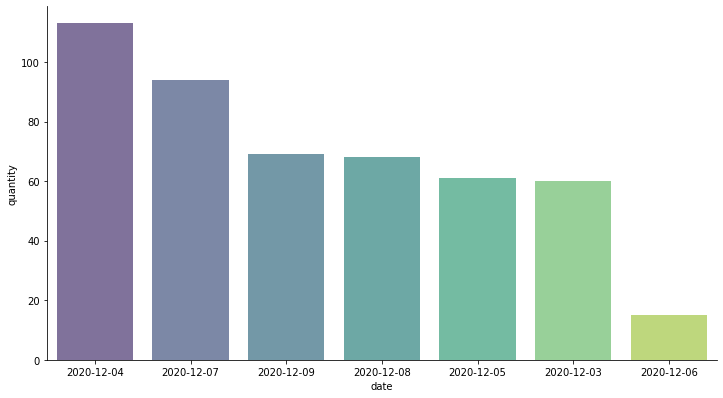

In [39]:
plt.figure(figsize=(12, 6.5))
sns.barplot(x=quant_vs_day.date, y=quant_vs_day.quantity, alpha=0.7, palette="viridis") # color
sns.despine();

In [45]:
df.drop_duplicates(subset=["date", "product_id", "name"]) \
    .groupby(["name", "product_id"]) \
    .agg({"date": "count"}) \
    .sort_values(by="date", ascending=False) \
    .head()

,,date
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2
Alexey_Fedorov,13,1
Petr_Smirnov,21,1
Petr_Petrov,64,1
